<a href="https://colab.research.google.com/github/gasparmamac/DeepLearningNotebook/blob/main/Image_Classification_with_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import requests
import zipfile
import matplotlib.pyplot as plt
import glob as glob
import os

In [6]:
def download_file(url, save_name):
  url = url
  if not os.path.exists(save_name):
    file = requests.get(url)
    open(save_name, 'wb').write(file.content)

In [4]:
def unzip(zip_file=None):
  try:
    with zipfile.ZipFile(zip_file) as z:
      z.extractall('./')
      print('Extracted all')
  except:
    print('Invalid file')

In [7]:
download_file(
    'https://www.dropbox.com/s/cprmbjb8l3olyiv/dataset_image_classification_cnn.zip?dl=1', 
    'dataset_image_classification_cnn.zip'
)
    
unzip(zip_file='dataset_image_classification_cnn.zip')

Extracted all


In [9]:
# read and display images
image_paths = glob.glob('dataset_image_classification_cnn/*.jpg')
print(image_paths)

['dataset_image_classification_cnn/car.jpg', 'dataset_image_classification_cnn/tiger.jpg', 'dataset_image_classification_cnn/dog.jpg']


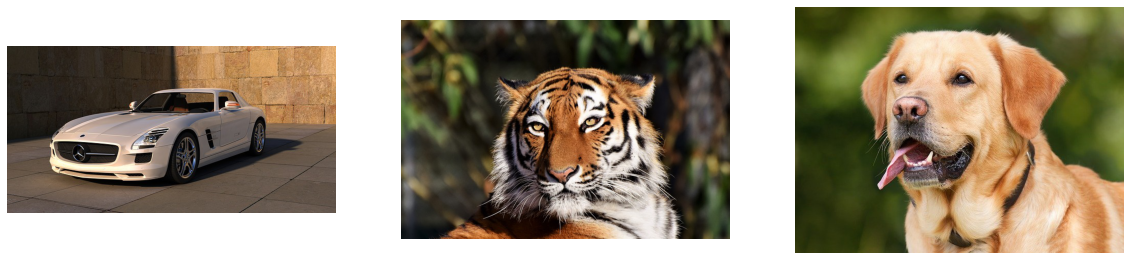

In [13]:
plt.figure(figsize=(20, 20))
for idx, image_path in enumerate(image_paths):
  image = plt.imread(image_path)
  plt.subplot(1, 3, idx+1)
  plt.imshow(image)
  plt.axis('off')
plt.show()

In [14]:
# Load the model ResNet50
model = tf.keras.applications.resnet50.ResNet50(weights='imagenet')

102967424/102967424 [==============================] - 5s 0us/step


In [15]:
model.output_shape

(None, 1000)

shape:  (325, 640, 3)
shape:  (224, 224, 3)
shape:  (1, 224, 224, 3)
1/1 [==============================] - 0s 32ms/step


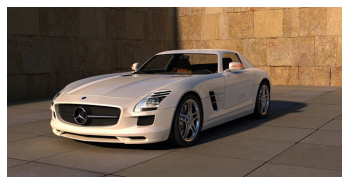

Prediction 0: convertible, 36.48%
Prediction 1: car_wheel, 18.32%
Prediction 2: sports_car, 17.01%
Prediction 3: racer, 10.51%
Prediction 4: grille, 6.52%
shape:  (426, 640, 3)
shape:  (224, 224, 3)
shape:  (1, 224, 224, 3)
1/1 [==============================] - 0s 29ms/step


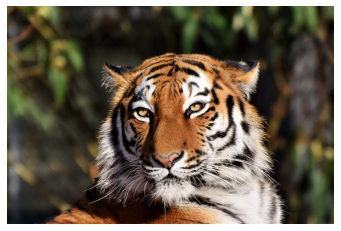

Prediction 0: tiger, 87.90%
Prediction 1: tiger_cat, 11.52%
Prediction 2: lynx, 0.28%
Prediction 3: snow_leopard, 0.11%
Prediction 4: leopard, 0.05%
shape:  (480, 640, 3)
shape:  (224, 224, 3)
shape:  (1, 224, 224, 3)
1/1 [==============================] - 0s 30ms/step


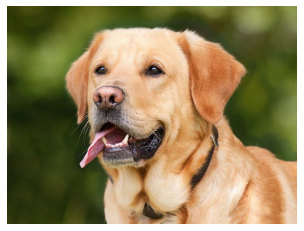

Prediction 0: Labrador_retriever, 52.55%
Prediction 1: kuvasz, 14.44%
Prediction 2: Irish_wolfhound, 7.73%
Prediction 3: Rottweiler, 2.82%
Prediction 4: flat-coated_retriever, 2.47%


In [18]:
# performm inference
for _, image_path in enumerate(image_paths):
  
  # read the images
  tf_image = tf.io.read_file(image_path)

  # decode tf_image above from bytes string to a tensor
  decoded_image = tf.image.decode_image(tf_image)
  print(f'shape: ', decoded_image.shape)

  # resize the image
  image_resized = tf.image.resize(decoded_image, (224, 224))
  print(f'shape: ', image_resized.shape)

  # add batch dimension at the beginning
  image_batch = tf.expand_dims(image_resized, axis=0)
  print(f'shape: ',image_batch.shape)

  # forward pass through the model
  predictions = model.predict(image_batch)

  # decode the predictions from the class number to actual class names
  processed_preds = tf.keras.applications.imagenet_utils.decode_predictions(
      preds=predictions,
      top=5
  )

  # display the image and print the top 5 predictions for each
  plt_image = plt.imread(image_path)
  plt.imshow(plt_image)
  plt.axis('off')
  plt.show()

  for num, pred in enumerate(processed_preds[0]):
    print(f'Prediction {num}: {pred[1]}, {pred[2]*100:.2f}%')